# Create Initial Conditions That Result in Spiral Defect Chaos
Tim Tyree<br>
6.8.2020

In [ ]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show
import skimage as sk
from skimage import measure, filters
import matplotlib.pyplot as plt, numpy as np, os
from numba import njit, jit, vectorize
from PIL import Image
import imageio
# import cv2 as cv



#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
width = 512
height = 512
channel_no = 3

#load the libraries
from lib import *
# from lib.operari import *
# from lib.ProgressBar import *
# from lib.minimal_model import *
# from lib.TexturePlot import *
# from lib.get_tips import *
# from lib.intersection import *
#TODO: use cuda via numba
# from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# from lib.contours_to_tips import *

%autocall 1
%load_ext autoreload
%autoreload 2

# create a 512x512x3 initial condition that's well controlled and produces SDC

## create a 'time origin' in a simple, controlled way
create a uniform, horizontal stimulus, then time step up to time = 100, at time steps of h = 0.01.  Record.

In [ ]:
# make the relevant initial texture
txt = np.zeros((512,512,3))
zero_txt = txt.copy()
txt[256-32:256+32,:,0] = 0.5
txt[...,1] = 0.5
txt[...,2] = 0.5
tme = 0

In [ ]:
plt.imshow(txt)

In [ ]:
h = 0.01
nsteps = 10**4
for step in range(nsteps):
    time_step(texture=txt, h = 0.01, zero_txt=zero_txt)
    tme += h
    printProgressBar(step + 1, nsteps, prefix = 'Progress:', suffix = 'Complete', length = 50)
beep(1)
print(f"the time is tme = {tme}.")

In [ ]:
save_fn = f"ic_{txt.shape[1]}x{txt.shape[0]}_t={0}.npz"
print(save_fn)
np.savez_compressed(f'{nb_dir}/Data/{save_fn}', txt)

## added a semicircle of stimulus tilted at 45º in the danger zone
- Then confirm that spiral defect chaos commenses

## load test cases for pbc

In [ ]:
data_dir = f'{nb_dir}/Data/ic_512x512_t=0.npz'
txt = np.load(data_dir)['arr_0']

In [ ]:
plt.imshow(txt)

# DONE: add a semicircle of stimulus tilted at 45º in the danger zone
- Then confirm that spiral defect chaos commenses

In [ ]:
#make initialization conditions
deg = 45
x0 = 512/2
y0 = 512/4

#make the initialization mesh
img = 0*txt[...,0].copy()
color_left_of_line(out=img, x0=x0, y0=y0, deg = deg, value=1.)  #make left of line mesh 0 or 1
color_outside_range(out=img, x0=x0,y0=y0,r=64*2, val=0.0)  #make circle mesh 0 or 1
#already done: hadamard product of the two.

plt.imshow(img)

In [ ]:
# save this init + the origin
out = txt.copy()
out[...,0] += 10.*img
plt.imshow(out)

In [ ]:
save_dir = nb_dir+f'/Data/ic_deg_{deg}_0'
np.save(save_dir+f'.npy', arr=out)
np.savez_compressed(save_dir+f'.npz', arr=out)

In [ ]:
save_dir


## off topic: get method from trimesh used to calculate volume

In [ ]:

# from skimage import draw

# circle_coords = draw.circle(r=100, c=100, radius=100, shape=(512,512,3))
# txt[circle_coords]


# compute initial point and final point of line that goes through the circle's center
# r0 = 0; c0 = xm - dst
# r1 = txt.shape[1]-1; c1 = xm + dsb
# draw that circle
# line = draw.line(r0, c0, r1, c1)

# ym = 512/4; xm = 512/2; #same as circle center
# deg   = 45 # number of degrees semicircle is cut by
# theta = deg/180*np.pi

# #dist to top
# dtt = ym
# #dist to bottom
# dtb = txt.shape[1]-ym-1
# #use trig to get dist to sides
# dst = int(np.around(np.tan(theta)*dtt))
# dsb = int(np.around(np.tan(theta)*dtb))


# img = 0*txt[...,0].copy()
# line_x = line[0]
# color_within_range(x0=512/2,y0=512/4,r=100, out=img, val=10., width=512,height=512)


In [ ]:
!pip3 install trimesh

In [ ]:
import trimesh
# from lib.operari import *
# import inspect

In [ ]:
file_name = 'ic_600x600.101.npz'
file_dir = find_files(file_name, search_path=nb_dir)
if len(file_dir)==0: raise('file not found')
# print(
file_dir=file_dir[0]
# )
# print(sys.path.exists(file_dir))

In [ ]:
# generate load_mesh from .npz array
txt = np.load(file_dir)['arr_0']

In [ ]:
# #make a log folder
make_log_folder(folder_name='Data/log-tmp/')

In [ ]:
# print(inspect.getsource(trimesh.creation.faces_to_edges))

In [ ]:
# print(inspect.getsource(trimesh.Trimesh.))
#     trimesh.Trimesh.mass_properties
trimesh.Trimesh.volume

In [ ]:
trimesh.

# move the computational geometry ipynbs and lib from rapids-notebook/'trimesh work' over here to python/notebooks/
Done on UB

## distractions

### TODO(when bored & w/ time): test trimesh.Trimesh.area and trimesh.Trimesh.volume can reproduce the right ratio for a sphere.

### TODO: What sized cube yields a unit volume output? Hint: what's the volume for a right tetrahedron?

### (and then) TODO: find out this "surface integral" that functionaly produces the volume of a watertight triangular mesh

# partition WJ's 600x600 ic into nine 200x200 patches. save
each patch is 5cm x 5 cm<br>
6.23.2020


In [ ]:
input_fn = search_for_file()

In [ ]:
txt = load_buffer(input_fn)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.11.npz'
txt_out = txt[0:200,0:200]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.12.npz'
txt_out = txt[200:400,0:200]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.13.npz'
txt_out = txt[400:600,0:200]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.21.npz'
txt_out = txt[0:200,200:400]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.22.npz'
txt_out = txt[200:400,200:400]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.23.npz'
txt_out = txt[400:600,200:400]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.31.npz'
txt_out = txt[0:200,400:600]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.32.npz'
txt_out = txt[200:400,400:600]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.33.npz'
txt_out = txt[400:600,400:600]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

# file IO method that compresses numpy arrays.  
8.13.2020
- TODO: see whether this compressed array format can store 3 channels of float instances at each pixel

In [ ]:
class IC_File(object):
    r"""Describe the class"""
    def __init__(self, folder, file_name):
        os.chdir(folder)
        f= open(file_name,"ab") #write to binary file: 'wb' ) )
        data = read_array(f)
        self.data = data
        # for i in range(10):
        #   f.write("This is line %d\r\n" % (i+1))
        f.close()
        self.folder = folder
        self.file_name = file_name
        
        self.width = None
        self.height= None
        self.xres = None
        self.yres = None
        
    def shape(self):
        return np.array((self.width,self.height), dtype=np.int)
    def area(self):
        shape = self.shape()
        da = self.xres()*self.yres()
        return da*shape[0]*shape[1]
    
def compress_array(array, save_file='data.pkl.lzma'):
    '''array is a numpy array.'''
    import pickle, gzip, lzma, bz2
    data = array
    # pickle.dump( data, gzip.open( 'data.pkl.gz',   'wb' ) ) # inferior to lzma
    pickle.dump( data, lzma.open( save_file, 'wb' ) )
    # pickle.dump( data,  bz2.open( 'data.pkl.bz2',  'wb' ) ) # inferior to lzma
    
def append_array(array, save_file='data.pkl.lzma'):
    '''array is a numpy array.'''
    import pickle, gzip, lzma, bz2
    data = array
    # pickle.dump( data, gzip.open( 'data.pkl.gz',   'wb' ) ) # inferior to lzma
#     pickle.dump( data, lzma.open( save_file, 'ab' ) ) # slightly smaller file size
    pickle.dump( data,  bz2.open( 'data.pkl.bz2',  'wb' ) ) # better loading speed for non-random numpy arrays

In [ ]:
!pip install hickle

In [ ]:
#consider using a hdf5 file structure to efficiently store numpy arrays using hickle!
import hickle as hkl 

data = { 'name' : 'test', 'data_arr' : [1, 2, 3, 4] }

# Dump data to file
hkl.dump( data, 'new_data_file.hkl' )

# Load data from file
data2 = hkl.load( 'new_data_file.hkl' )

print( data == data2 )

There also is the possibility to "pickle" directly into a compressed archive by doing:

In [ ]:
folder = fi

# TODO: use dask to load/write these files (check chrome!)

# partition WJ's 600x600 ic into nine 200x200 patches. save
each patch is 5cm x 5 cm<br>
6.23.2020


In [ ]:
# def load_fortran(input_fn):
#     #load txt
#     arr = np.loadtxt(input_fn)
#     #WJ's files come to 16 digits of machine precision.
#     arr = arr.astype(dtype = np.float64, casting='same_kind', order='C', copy=False)

#     N = arr.shape[0]
#     n = np.sqrt(N)
#     if not n == np.int(n):
#         raise Exception('Error: Input array is not a square matrix!')
#     n = int(n)
#     arr = arr.reshape(n,n,arr.shape[-1], order='C')
#     return arr

In [ ]:
# def _precision(arr):
#     val = arr[0,0]
#     return ( precision := len(str(val))-2 )
# def _dtype(arr):
#     val = arr[0,0]
#     return ( dtype := type(val) )

In [ ]:
input_fn = search_for_file()

In [ ]:
#TODO: test that the input_fn is given as the absolute file path and fix it if it isn't
base_folder = '/'+os.path.join(*input_fn.split('/')[:-2])#+'/ds_5_param_set_8/trajectories/'


precision = _precision(arr)
dtype = _dtype(arr)

# val = arr[0,0]
# arr = arr.astype(dtype = np.float16, casting='same_kind', order='F', copy=False)

os.chdir(tmp_folder)
tmp_fn = file_name+'.npz'
# np.savez_compressed(tmp_fn,arr)
# txt = load_buffer(tmp_fn)
txt = arr

# sub_id = 33
# initial_condition_dir = nb_dir + f'/Data/initial-conditions/ic_200x200.101.{sub_id}.npz'
tip_position_dir = tip_log_dir.replace('.csv','_processed.csv')
save_folder_traj = '/'+os.path.join(*initial_condition_dir.split('/')[:-2])+'/ds_5_param_set_8/trajectories/'
birth_death_dir = '/'.join(save_folder_traj.split('/')[:-2])+'/birth-death-rates'


In [ ]:
# def chunk_600x600_into_ninths(txt,file_name, save_folder):
#     '''suppose file_name is a bare string with no extension such as ".npz"
#     suppose txt is a numpy array that is (600,600,The_Rest)
#     '''
#     os.chdir(save_folder)
#     save_fn = file_name+'.11.npz'
#     txt_out = txt[0:200,0:200]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.12.npz'
#     txt_out = txt[200:400,0:200]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.13.npz'
#     txt_out = txt[400:600,0:200]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.21.npz'
#     txt_out = txt[0:200,200:400]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.22.npz'
#     txt_out = txt[200:400,200:400]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.23.npz'
#     txt_out = txt[400:600,200:400]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.31.npz'
#     txt_out = txt[0:200,400:600]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.32.npz'
#     txt_out = txt[200:400,400:600]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.33.npz'
#     txt_out = txt[400:600,400:600]
#     np.savez_compressed(save_fn,txt_out)
#     return True

# functionally convert one of WJ's 600x600 ic_files into nine 200x200 ic_files
each patch is 5cm x 5 cm<br>
8.13.2020


In [ ]:
chunk_600x600_into_ninths(txt=arr,file_name=file_name.replace('600','200'), save_folder=save_folder)

In [ ]:
os.system('ls')

In [ ]:
#list all files in the cwd
file_list = os.listdir()
in_fn = file_list[0]

In [ ]:
#load a .npz file
txt = load_buffer(in_fn)

In [ ]:
def parse_input_fn(input_fn):
    '''file_name, input_folder, output_folder, tmp_folder = parse_input_fn(input_fn)
    changes to input_folder in the local scope.'''
    file_name     = input_fn.split('/')[-1]
    input_folder  = '/'+os.path.join(*input_fn.split('/')[:-1])
    os.chdir(input_folder)
    if not os.path.isabs(input_folder):
        input_folder = os.getcwd()
    base_folder   = '/'+os.path.join(*input_folder.split('/')[:-1])
    tmp_folder    = base_folder+'/ic-tmp'
    output_folder = base_folder+'/ic-in'
    return file_name, input_folder, output_folder, tmp_folder

# Create Initial Conditions That Result in Spiral Defect Chaos for the Luo-Rudy model
Tim Tyree<br>
1.15.2021

In [33]:
from lib.my_initialization import *
from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting
from lib.model.LR_model import *
from lib.utils.utils_traj import *
from lib.routines.bdrates import *
from lib.measure.utils_measure_tips_cpu import *
from lib.utils.stack_txt_LR import *
from lib.viewer import *
import trackpy

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
#make plots in darkmode
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## initialize a 600x600 square computational domain with the correct number of channels and as repolarized excitable myocardial tissue

In [35]:
width=600
height=600
ds=15.0
dt,one_step_map=get_one_step_map(
    nb_dir,
    dt=0.1,
    width=width,height=height,ds=ds,
    diffCoef=0.001,
    Cm=1.0,
)

In [36]:
def get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 2*10**-4):
    zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
    zero_c6=np.zeros(shape=(width,height,6), dtype=np.float64, order='C')
    #allocate memory to texture
    inVc=zero_c2.copy()
    inVc[...,0]+=V_initial
    inVc[...,1]+=Ca_i_initial
    outVc=inVc.copy()
    inmhjdfx=zero_c6.copy()
    #open the gates that are open at equilibrium at the resting potential (h, j, f)
    inmhjdfx[...,1]=1.
    inmhjdfx[...,2]=1.
    inmhjdfx[...,4]=1.
    outmhjdfx=inmhjdfx.copy()
    dVcdt=zero_c2.copy()
    txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    return txt

In [37]:
#get time steps
from lib.model.LR_model_optimized_w_Istim import *

#get the onestep kernels
dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

#(not terribly useful) get the forward integrate kernel
# forward_integrate_kernel= get_forward_integrate_kernel(nb_dir,dt,width,height,ds,diffCoef=0.001,Cm=1.)

### DONE: test - time step a number of times and verify that nothing happens

In [4]:
txt_prv=txt.copy()
for n in range(50):
    txt=one_step_map(txt)
txt_nxt=txt.copy()

In [ ]:
delta_txt=txt_nxt-txt_prv

In [ ]:
chnl=17
img=delta_txt[...,chnl]
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}',c='w',fontsize=22)
plt.show()

In [ ]:
print('max absolute differences between input and output, by channel')
for chnl in range(18):
    img=delta_txt[...,chnl]
    print(np.max(np.abs(img)))

# define txt_Istim textures that give a line stimulus of constant electric flux


In [43]:
chnlno=2+2+6+6+2
zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
zero_c6=np.zeros(shape=(width,height,6), dtype=np.float64, order='C')
print(f"# of channels is {chnlno}.")

mag=-3
txt_Istim=zero_c2[...,0].copy()
txt_Istim[:,:5]=mag
txt_Istim_left=txt_Istim.copy()

mag=-3
txt_Istim=zero_c2[...,0].copy()
txt_Istim[300:301,:]=mag
txt_Istim_top=txt_Istim.copy()

txt_Istim_none=zero_c2[...,0].copy()

# of channels is 18.


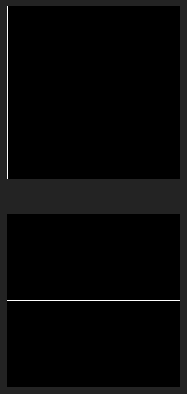

In [44]:
fig,axs=plt.subplots(2)
ax=axs[0]
ax.imshow(-txt_Istim_left,cmap='gray')#,vmin=-10, vmax=15)
ax.axis('off')
ax=axs[1]
ax.imshow(-txt_Istim_top,cmap='gray')#,vmin=-10, vmax=15)
ax.axis('off')
plt.show()

# (ignore) dev CUDA

## (working brainwarmer) compute the coordinate textures using numba.cuda.jit

In [7]:
txt=get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 2*10**-4)
t=0.

#test onestep methods
kernelA(txt,txt_Istim_left)
kernelB(txt,txt_Istim_left)

In [8]:
import numba.cuda as cuda
from lib.controller.one_step_splitting_cuda_kernels import *


In [9]:
@cuda.jit('void(int32[:], int32[:], int32[:,:])')
def foo(aryA, aryB,aryC):
    for n,A in enumerate(aryA):
        for m,B in enumerate(aryB):
            aryC[n,m]=A+B

griddim = 100, 2
blockdim = 3, 3
width=600
height=600
aryA=np.zeros(width,dtype=np.int32)
aryB=np.arange(height)#np.zeros(height,dtype=np.float64)
ndim=aryA.shape[0]
mdim=aryB.shape[0]
aryC=np.zeros(shape=(ndim,mdim),dtype=np.int32)

foo[griddim, blockdim](aryA, aryB, aryC)
xcoord=aryC.copy()
foo[griddim, blockdim](aryB, aryA, aryC)
ycoord=aryC.copy()



# one_step_kernel=cuda.jit(one_step_map_w_Istim)

In [ ]:
foo[griddim, blockdim](aryB, aryA, aryC)


In [ ]:
bpg = 50
tpb = 32
n = bpg * tpb

@cuda.jit('(float32[:,:], float32[:,:], float32[:,:])', target='gpu')
def cu_square_matrix_mul(A, B, C):
    sA = cuda.shared.array(shape=(tpb, tpb), dtype=float32)
    sB = cuda.shared.array(shape=(tpb, tpb), dtype=float32)

    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    bx = cuda.blockIdx.x
    by = cuda.blockIdx.y
    bw = cuda.blockDim.x
    bh = cuda.blockDim.y

    x = tx + bx * bw
    y = ty + by * bh

    acc = 0.
    for i in range(bpg):
        if x < n and y < n:
            sA[ty, tx] = A[y, tx + i * tpb]
            sB[ty, tx] = B[ty + i * tpb, x]

        cuda.syncthreads()

        if x < n and y < n:
            for j in range(tpb):
                acc += sA[ty, j] * sB[j, tx]

        cuda.syncthreads()

    if x < n and y < n:
        C[y, x] = acc

In [ ]:
O=np.ones((4,4))
out=O.copy()
cu_square_matrix_mul(O, O, out)

## use cuda.grid?
source:

https://towardsdatascience.com/better-parallelization-with-numba-3a41ca69452e

In [ ]:
@cuda.jit
def get_nearby_kernel(coord1, coord2, max_dist, out):
    start = cuda.grid(1)
    stride = cuda.gridsize(1)
    lat_filter = max_dist / 100
    
    for i in range(start, coord1.shape[0], stride):
        ct = 0
        _lat1 = coord1[i,0]
        _lng1 = coord1[i,1]
        
        for j in range(coord2.shape[0]):
            _lat2 = coord2[j,0]
            _lng2 = coord2[j,1]
            # escape condition if latitudes are too far apart
            if math.fabs(_lat1 - _lat2) <= lat_filter:
                dist = haversine_cuda(_lat1, _lng1, _lat2, _lng2)
                if dist < max_dist:ct += 1
                
        out[i] = ct

## (not working) waste a horrid amount of time trying to GPU accelerate a working CPU kernel.  Idiot.
test a new one_step_kernel that adds the input Istim to Iion
- TODO(later): accelerate ^this with CUDA

In [9]:
from lib.controller.one_step_splitting_kernels import *
from numba import cuda
print ( cuda.is_available() )
print ( cuda.detect() )

True
Found 1 CUDA devices
id 0    b'GeForce RTX 2080 with Max-Q Design'                              [SUPPORTED]
                      compute capability: 7.5
                           pci device id: 0
                              pci bus id: 1
Summary:
	1/1 devices are supported
True


In [10]:
#initialize txt
txt=get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 2*10**-4)
t=0.

In [ ]:
#multiple streams should have a common context
# drv=cuda.driver.Driver()
# drv.initialize()
# handle=drv.pop_active_context()
# stream=ctx.create_stream()

In [12]:
d_txt=cuda.to_device(txt,stream=stream)
d_txt_Istim_left=cuda.to_device(txt_Istim_left,stream=stream)

griddim = 100, 3
blockdim = 3, 3
stream=cuda.stream()
sharedmem=10*(d_txt.size+d_txt_Istim_left.size)


In [7]:
# forward_integrate_kernel= get_forward_integrate_kernel(nb_dir,dt,width,height,ds,stream,diffCoef=0.001,Cm=1.)


In [6]:
# nsteps=1000
# forward_integrate_kernel[griddim, blockdim, stream, sharedmem](d_txt,d_txt_Istim_left,nsteps)

# retval=d_txt.to_host()
# cuda.close()


In [ ]:
dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds,stream)

In [ ]:
# forward_integrate_kernel=get_forward_integrate_kernel(kernelA, kernelB, griddim = (3, 3), blockdim = (3, 3))
get_one_step_map_w_Istim(nb_dir,dt)

In [ ]:
# take 1000 time steps to 100ms
num_steps=1000#000
update_every=100
step_count=0
for n in range(num_steps):
    
#     kernelA[griddim, blockdim, stream, sharedmem](d_txt,d_txt_Istim_left)
#     cuda.syncthreads()
#     cuda.synchronize()

#     kernelB[griddim, blockdim, stream, sharedmem](d_txt,d_txt_Istim_left)
#     cuda.syncthreads()
#     cuda.synchronize()

    t+=dt
    step_count+=1
    if step_count%update_every==0:
        printProgressBar(step_count,num_steps)
print(f"the final time is t = {t} ms.")

In [ ]:
txt=d_txt.to_host()
# txt


In [ ]:
# kernelB[griddim, blockdim](d_txt,d_txt_Istim_left)
d_txt.to_host()

In [ ]:
# cuda.close()
d_txt

In [ ]:
chnl=17
img=txt[...,chnl]
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}',c='w',fontsize=22)
plt.show()

In [ ]:
# take 1000 time steps to 100ms
numsteps=1000
update_every=100
step_count=0
for n in range(numsteps):
    kernelA(txt,txt_Istim_left)
    kernelB(txt,txt_Istim_left)
    t+=dt
    step_count+=1
    if step_count%update_every==0:
        printProgressBar(step_count,num_steps)

In [9]:
# txt[0,0,:18].shape
dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim__cuda_kernel(nb_dir,dt,width,height,ds,stream)

TypeError: get_one_step_explicit_synchronous_splitting_w_Istim_kernel() missing 1 required positional argument: 'stream'

In [ ]:
# @cuda.jit('void(float64[:,:,:], float64[:,:])')
# def one_step_kernel(txt,txt_Istim_left):
#     kernelA(txt,txt_Istim_left)
#     kernelB(txt,txt_Istim_left)

In [13]:
# #take 1000 time steps to 100ms, stimulating onthe left
# tf=100
# num_steps=int(tf/dt)
# t+=dt*num_steps
# forward_integrate_kernel(txt,txt_Istim_left,num_steps)
# beep(3)
# t+=dt*num_steps

# Generate a stable spiral wave using cross-stimulation for the LR model

In [45]:
#initialize txt
# V_initial=-85.
# Ca_i_initial = 2*10**-4
txt=get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 4*10**-3)# 2*10**-4)
t=0.

In [46]:
#take 1000 time steps to 100ms, stimulating onthe left
tf=10
num_steps=int(tf/dt)
txt_Istim=txt_Istim_left.copy()
update_every=10
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    t+=dt
    step_count+=1
    if step_count%update_every==0:
        printProgressBar(step_count,num_steps)
txt_a1=txt.copy()
print(f"\nthe final time is t = {t:.1f} ms.\n")
# beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 10.0 ms.



9.99999999999998


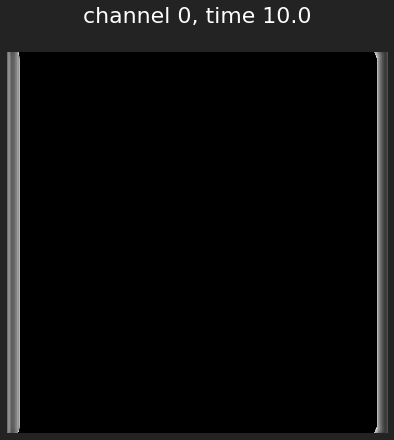

In [47]:
#Visualize the buffer (plain)
chnl=0
print(t)
img=txt_a1[...,chnl]
plt.imshow(img,cmap='gray',vmin=-10, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='w',fontsize=22)
plt.show()

In [48]:
#integrate 200ms without stimulation
# t=100
# txt=txt_a.copy()
tf=130
num_steps=int((tf-t)/dt)
txt_Istim=txt_Istim_none
update_every=50
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
        t+=dt*update_every
        printProgressBar(step_count,num_steps)
txt_a2=txt.copy()
print(f"\nthe final time is t = {t:.1f} ms.\n")
beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 130.0 ms.



0

129.99999999999997


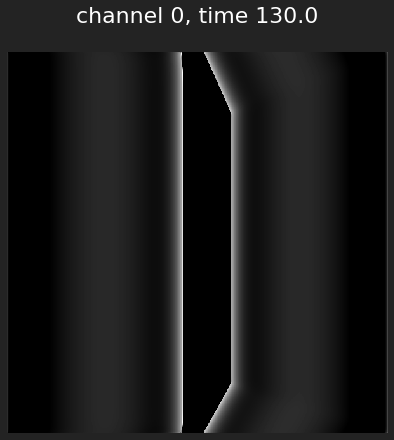

In [49]:
#Visualize the buffer (plain)
chnl=0
print(t)
ta2=t#110
img=txt_a2[...,chnl]
plt.imshow(img,cmap='gray',vmin=-10, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {ta2:.1f}\n',c='w',fontsize=22)
plt.show()

- TODO: test why repolarization is failing to occur
    - __Question__: is intercellular calcium starting too low (retrying at 20X higher initial calcium...)
        - no.
    - __Question__: is WJ's param change in vx1 to blame?
        - ??
        

In [50]:
#save texture at this time t
save=False
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/txt_a2.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [51]:
dt
# dt=0.1
# dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

0.1

In [52]:
# #load the buffer loaded
# t=130.
# img_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/txt_a2.npz'
# txt=load_buffer(img_fn)[0]
# txt.shape

129.99999999999997


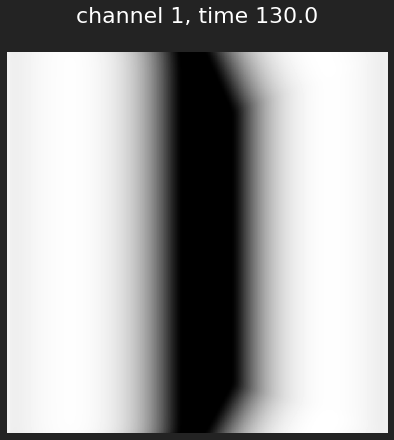

In [53]:
#Visualize the buffer (plain)
chnl=1
print(t)
ta2=t#110
img=txt[...,chnl]
if chnl==0:
    plt.imshow(img,cmap='gray',vmin=-10, vmax=15)
else:
    plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}, time {ta2:.1f}\n',c='w',fontsize=22)
plt.show()


In [54]:
# #is calcium not repolarizing?
# # print(Ca_i_initial)
# plt.hist(img.flatten())
# plt.show()

In [55]:
#integrate without stimulation
t=130
txt=txt_a2.copy()
tf=160#150
num_steps=int((tf-t)/dt)
txt_Istim=txt_Istim_none
update_every=50
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
        t+=dt*update_every
        printProgressBar(step_count,num_steps)
txt_a3=txt.copy()
print(f"\nthe final time is t = {t:.1f} ms.\n")
# beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 160.0 ms.



160.0


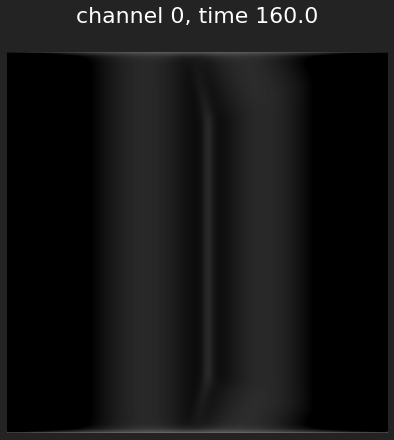

In [56]:
#Visualize the buffer (plain)
chnl=0
print(t)
ta2=t#110
img=txt[...,chnl]
if chnl==0:
    plt.imshow(img,cmap='gray',vmin=-10, vmax=15)
else:
    plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}, time {ta2:.1f}\n',c='w',fontsize=22)
plt.show()

In [57]:
#define the top stimulation width (wag) and magnitude (mag)
mag=-1.77#-10#-3.
wag=5
zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
txt_Istim=zero_c2[...,0].copy()
txt_Istim[300:300+wag,:]=mag
txt_Istim_top=txt_Istim.copy()

In [58]:
#take 1000 time steps to 100ms, stimulating on the top
tf=100#10
# t=130
txt=txt_a3.copy()
# txt=txt_a2.copy()
num_steps=int(tf/dt)
txt_Istim=txt_Istim_top.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
        t+=dt*update_every
        #TODO: compute dict_out here
        printProgressBar(step_count,num_steps)
print(f"\nthe final time is t = {t:.1f} ms.")
txt_b=txt.copy()
# beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 260.0 ms.


260.0


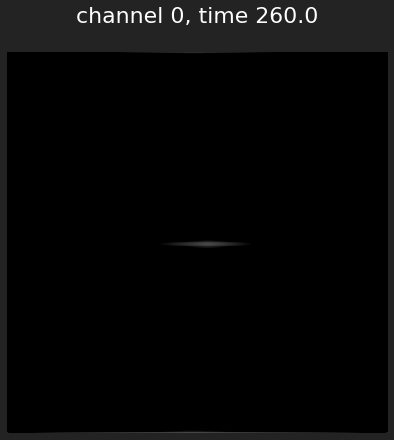

In [59]:
#Visualize the buffer (plain)
chnl=0
print(t)
img=txt_b[...,chnl]
plt.imshow(img,cmap='gray',vmin=-10, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='w',fontsize=22)
plt.show()

In [60]:
#take 10000 time steps forward 1 sec without stimulation
tf=100
t=170
txt=txt_b.copy()
num_steps=int(tf/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
        t+=dt*update_every
        #compute dict_out
        printProgressBar(step_count,num_steps)
print(f"\nthe final time is t = {t} ms.")
# beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 270.0 ms.


In [64]:
#10s after second shock, at time t=12 seconds
txt_1=txt.copy()
t

270.0

270.0


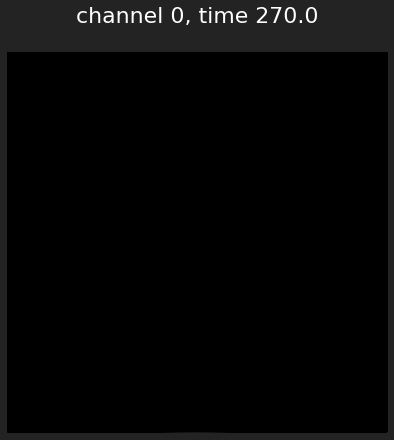

In [65]:
#Visualize the buffer (plain)
chnl=0
print(t)
img=txt_1[...,chnl]
plt.imshow(img,cmap='gray',vmin=-10, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='w',fontsize=22)
plt.show()

In [66]:
beep(10)
np.max(txt[...,0])

-6.1749352192281926

In [31]:
#take 10000 time steps forward 1 sec without stimulation
tf=100
# txt=txt_b.copy()
num_steps=int(tf/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
        t+=dt*update_every
        #compute dict_out
        printProgressBar(step_count,num_steps)
print(f"\nthe final time is t = {t} ms.")
beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 370.0 ms.


0

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic600x600_tt/ic001.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

18

# TODO(now): the tissue is not repolarizing.  check mean values of each channel and compare to repolarized initialization

In [48]:
ml=[]
for chnl in range(chnlno):
    ml.append(np.mean(txt[...,chnl].flatten()))
print(ml)

[-84.16189785830106, 0.00022695231645371555, -84.16189785830106, 0.00022695231645371555, 0.009673785005339875, 0.9663590820390181, 0.9441396090528997, 0.007911797342986642, 0.9384883333541671, 0.11626098328827915, 0.009673785005339875, 0.9663590820390181, 0.9441396090528997, 0.007911797342986642, 0.9384883333541671, 0.11626098328827915, -0.0013402431801532823, -4.114634609504005e-06]


370.0


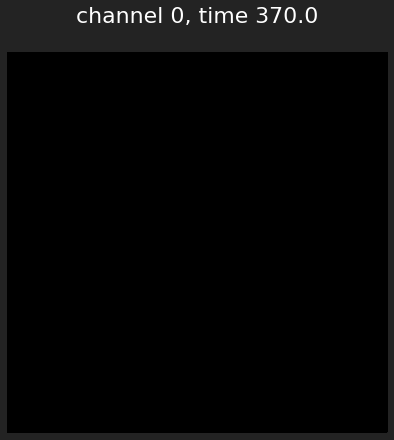

In [47]:
#Visualize the buffer (plain)
chnl=0
print(t)
img=txt[...,chnl]
plt.imshow(img,cmap='gray',vmin=-10, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='w',fontsize=22)
plt.show()

In [63]:
#initialize txt
txt=get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 4*10**-3)# 2*10**-4)
t=0.

In [64]:
ml=[]
for chnl in range(chnlno):
    ml.append(np.mean(txt[...,chnl].flatten()))
print(ml)

[-85.0, 0.0040000000000000036, -85.0, 0.0040000000000000036, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]


## observe apparently present spiral tips

### Show all spiral tips present


In [ ]:
#compute all spiral tips present
V_threshold=25.#mV
level1=V_threshold
# theta_threshold=0.
level2=0.
#take the first step
one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
t+=dt
img=inVc[...,0]
dimgdt=dVcdt[...,0]
width=200;height=200
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2,width=width,height=height)
dict_out_instantaneous=dict_out
print(np.max(inVc[...,0]))

In [ ]:
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['v'])
print(f"{dict_out['n']} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
plt.show(fig)

In [ ]:
#save texture at this time t
save=False
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/test_data/test_txt_LR_euler_t_{int(t)}.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

### generate some spiral tips

In [ ]:
dt, arr39, one_step_method = get_one_step_explicit_synchronous_splitting(nb_dir,dt)
print(get_one_step_explicit_synchronous_splitting)

In [ ]:
#forward euler explicit synchronous integration
tf=1000.
tmax=tf
save_every_n_frames=10.
V_threshold=25.#mV0.#-37.#mV
level1=V_threshold; level2=0.
num_steps=int(tf/dt)
step_count=0
n_tips_lst=[];t_lst=[];dict_out_lst=[]
save_dict_every=100
n_tips=1
while (t<tmax) & (n_tips > 0):
    if step_count%save_every_n_frames != 0:
        #forward Euler integration in time
        txt=one_step_map(txt)
    else:   

        #compute tip locations in dict_out
        #update texture namespace
        inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
        txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
        img=inVc[...,0]
        dimgdt=dVcdt[...,0]
        dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)

        #save tip data
        n_tips=dict_out['n']
        n_tips_lst.append(n_tips)
        t_lst.append(t)
        #         if count%save_dict_every==0:
        dict_out_lst.append(dict_out)
    
        #integrate by dt
        txt=one_step_map(txt)
    t+=dt
    step_count+=1
    printProgressBar(step_count,num_steps)
    if n_tips==0:
        print(f"zero tips remaining at time t={t}!")
        break
beep(3)

### TODO(later maybe): apply the dormand-prince one_step method.  
- how does it's runtime compare?
- how does the quality of results compare?
- note: the time step is already 0.1 ms, and the one_step is at least second order accurate.